Numpy je základní Python knihovna pro práci s numerickými daty, konkrétně s 1- až n-rozměrnými maticemi. Implementace (pro CPython) je z velké části napsána v C a Fortranu a používá BLAS knihovny. Numpy tak umožňuje pracovat s numerickými daty ve stylu Python kontejnerů (existují samozřejmě rozdíly) a zároveň zachovat rychlost kompilovaných jazyků.
<!-- TEASER_END -->

Tento notebook byl z části převzat a přeložen z J.R. Johansson: [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) - díky.

## Importujeme numpy

Chceme-li použít `numpy`, je samozřejmě nutné modul importovat. Pro interaktivní použití se často importuje vše pomocí 


In [1]:
from numpy import *

Jinak se obvykle používá

In [2]:
import numpy as np

## IPython pylab

Můžeme také použít prostředí `pylab`, které oba importy provede. Navíc importuje také grafickou knihovnu `matplotlib`, kterou blíže představíme později.

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Vytváříme `numpy` pole (`array`)
Existuje několik způsobů, jak vytvořit nové numpy pole.

* Z nějakého kontejneru typu seznam (`list`) nebo `tuple`.
* Pomocí funkce numpy, která generuje `array`, např. `zeros` nebo `arange`.
* Načtením ze souboru.

### Ze seznamu
Na seznam použijeme funkci `array`.

In [4]:
# vektor
v = array([1,2,3,4])
print(str(v))
print(repr(v))

[1 2 3 4]
array([1, 2, 3, 4])


Matice se vytvoří z vnořeného seznamu.

In [5]:
M = array([[1, 2], [3, 4]])
print(M)

[[1 2]
 [3 4]]


`v` and `M` jsou oboje typu `ndarray`.

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

Rozdíl mezi nimi je jejich rozměr, který dostaneme pomocí `shape` property (property proto, že shape lze i měnit).

In [7]:
v.shape

(4,)

In [8]:
M.shape

(2, 2)

Počet prvků získáme pomocí `size`.

In [9]:
M.size

4

In [10]:
v.size

4

Počet dimenzí je v `ndim`.

In [11]:
M.ndim

2

Zatím vypadá `numpy.ndarray` hodně podobně jako (vnořený) seznam. Proč jednoduše tedy jednoduše nepoužívat seznam místo vytváření nového typu?
Existuje několik velmi dobrých důvodů:

* Python seznamy jsou příliš obecné. Mohou obsahovat jakýkoliv druh objektu. Jsou dynamicky typované. Nepodporují matematické funkce, jako maticové násobení. Implementating takové funkce pro seznamy by nebylo příliš efektivní.
* NumPy pole jsou staticky typovaná a homogenní. Typ prvků je určen při vytvoření pole.
* NumPy pole jsou efektivně uložena v paměti.
* Díky těmto vlastnostem lze implementovat matematické operace, jako je násobení nebo sčítání, v rychlém, kompilovaném jazyce (C/Fortran).
Použití dtype (datový typ) vlastnost ndarray, můžeme vidět, jaký typ dat v poli má:

`dtype` property vrátí typ prvků v numpy poli.

In [12]:
M.dtype

dtype('int64')

Jiný typ do pole uložit nelze:

In [13]:
M[0,0] = "hello"

ValueError: invalid literal for long() with base 10: 'hello'

Typ prvků můžeme deklarovat explicitně při vytváření pole.

In [14]:
M = array([[1, 2], [3, 4]], dtype=complex)
M

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Běžné (vestavěné) typy pro `dtype` jsou: `int`, `float`, `complex`, `bool`, `object`, atd.

Můžeme také definovat velikost pomocí `numpy` typů `int64`, `int16`, `float128`, `complex128`, aj.

### Pomocné generátory polí
Zejména velká pole by bylo nepraktické inicializovat pomocí seznamů. Naštěstí v numpy existují [funkce](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html), které generují typická pole.

**`arange`** vygeneruje posloupnost, syntaxe je stejná jako `range`

In [15]:
arange(0, 10, 1)  # argumenty: start, stop, step

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
arange(-1, 0, 0.1)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1])

**`linspace`** a **`logspace`** vytváří posloupnosti s daným počtem prvků.

In [17]:
# první a poslední prvek jsou obsaženy ve výsledku
linspace(0, 10, 9)

array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,  10.  ])

In [18]:
logspace(0, 10, 9, base=10)

array([  1.00000000e+00,   1.77827941e+01,   3.16227766e+02,
         5.62341325e+03,   1.00000000e+05,   1.77827941e+06,
         3.16227766e+07,   5.62341325e+08,   1.00000000e+10])

**`ones`** a **`zeros`** vytvoří pole ze samých nul nebo jedniček.

In [19]:
ones(3)

array([ 1.,  1.,  1.])

In [20]:
# pokud chceme 2 a více rozměrů, musíme zadat rozměr jako tuple
zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

**`mgrid`** tvoří pravidelnou mříž. Existuje také

In [21]:
# všimněte si syntaxe s hranatými závorkami, mgrid se nevolá jako funkce
x, y = mgrid[0:3, 0:3]
print(x)
print(y)

[[0 0 0]
 [1 1 1]
 [2 2 2]]
[[0 1 2]
 [0 1 2]
 [0 1 2]]


Náhodná data vytvoří funkce **`rand`** a další z modulu **`random`**.

In [22]:
# několik náhodných čísel [0, 1] s rovnoměrným rozdělením
random.rand(4)

array([ 0.11678593,  0.00557639,  0.21995378,  0.33746315])

In [23]:
# matice s náhodnými čísly z normálním rozdělením
random.randn(4,4)

array([[ 0.00742627, -0.30885475,  1.0026792 ,  0.94160348],
       [-0.53390557, -0.30486637,  0.47146911,  0.20356802],
       [-0.70478978, -0.45532906,  0.37203665,  0.27507511],
       [ 0.09157739, -1.46566093, -1.82001826, -1.44042163]])

**`diag`** vytvoří diagonální matici, případně vrátí diagonálu matice.

In [24]:
# diagonální matice
diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [25]:
# vrátí diagonálu jako vektor
diag(diag([1,2,3]))

array([1, 2, 3])

### Cvičení

1. Vytvořte náhodné pole 3x3x3
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod diagonálou.

## Práce se soubory

### ASCII soubory
S textovými (ASCII) soubory obsahující data se setkáváme stále často, přestože to z mnoha důvodů není ideální formát. Na čtení ASCII (spadá sem i CSV) máme v Numpy `genfromtxt` a `loadtxt`. V [dokumentaci](http://docs.scipy.org/doc/numpy/reference/routines.io.html) se dozvíte, jak přesně fungují a jaké mají argumenty.

In [26]:
%%file ascii_data_1.txt
 1    -6.1    -6.1    -6.1 1
 2   -15.4   -15.4   -15.4 1
 3   -15.0   -15.0   -15.0 1
 4   -19.3   -19.3   -19.3 1
 5   -16.8   -16.8   -16.8 1
 6   -11.4   -11.4   -11.4 1
 7    -7.6    -7.6    -7.6 1
 8    -7.1    -7.1    -7.1 1
 9   -10.1   -10.1   -10.1 1
10    -9.5    -9.5    -9.5 1

Overwriting ascii_data_1.txt


Předchozí příkaz vytvořil soubor ascii_data_1.txt. Nyní se ho pokusíme načíst pomocí `genfromtxt`.

In [27]:
data = genfromtxt('ascii_data_1.txt')
print(data)

[[  1.   -6.1  -6.1  -6.1   1. ]
 [  2.  -15.4 -15.4 -15.4   1. ]
 [  3.  -15.  -15.  -15.    1. ]
 [  4.  -19.3 -19.3 -19.3   1. ]
 [  5.  -16.8 -16.8 -16.8   1. ]
 [  6.  -11.4 -11.4 -11.4   1. ]
 [  7.   -7.6  -7.6  -7.6   1. ]
 [  8.   -7.1  -7.1  -7.1   1. ]
 [  9.  -10.1 -10.1 -10.1   1. ]
 [ 10.   -9.5  -9.5  -9.5   1. ]]


In [28]:
# loadtxt by mělo fungovat také
data2 = loadtxt('ascii_data_1.txt')
print(data2)

[[  1.   -6.1  -6.1  -6.1   1. ]
 [  2.  -15.4 -15.4 -15.4   1. ]
 [  3.  -15.  -15.  -15.    1. ]
 [  4.  -19.3 -19.3 -19.3   1. ]
 [  5.  -16.8 -16.8 -16.8   1. ]
 [  6.  -11.4 -11.4 -11.4   1. ]
 [  7.   -7.6  -7.6  -7.6   1. ]
 [  8.   -7.1  -7.1  -7.1   1. ]
 [  9.  -10.1 -10.1 -10.1   1. ]
 [ 10.   -9.5  -9.5  -9.5   1. ]]


`savetxt` můžeme použít na uložení.

In [29]:
savetxt("ascii_data_1_new.txt", data, fmt="%6g")
!cat ascii_data_1_new.txt

     1   -6.1   -6.1   -6.1      1
     2  -15.4  -15.4  -15.4      1
     3    -15    -15    -15      1
     4  -19.3  -19.3  -19.3      1
     5  -16.8  -16.8  -16.8      1
     6  -11.4  -11.4  -11.4      1
     7   -7.6   -7.6   -7.6      1
     8   -7.1   -7.1   -7.1      1
     9  -10.1  -10.1  -10.1      1
    10   -9.5   -9.5   -9.5      1


### Npy formát
Pomocí `save` a `load` můžete jednoduše ukládat a nahrávat Numpy objekty.

In [30]:
save("ascii_data_1_new.npy", data)

In [31]:
data2 = load("ascii_data_1_new.npy")
print(data - data2)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


## Práce s poli

### Indexování a řezání
Numpy pole můžeme indexovat podobně jako list.

In [32]:
# první prvev vektoru
v[0]

1

In [33]:
# pro matice můžeme použít rozšířeného indexování
M[1,1]

(4+0j)

Pokud jeden index vynecháme, vrátí numpy N-1 rozměrný řez.

In [34]:
# toto vrátí první řádek
M[1]

array([ 3.+0.j,  4.+0.j])

Toho samého docílíme pomocí :.

In [35]:
M[1,:]

array([ 3.+0.j,  4.+0.j])

In [36]:
# první sloupec
M[:,1]

array([ 2.+0.j,  4.+0.j])

Můžeme také přiřazovat honoty do indexovaných polí.

In [37]:
M[0,0] = -1+1j
print(M)

[[-1.+1.j  2.+0.j]
 [ 3.+0.j  4.+0.j]]


In [38]:
# to funguje i pro více prvků
M[1,:] = 0
print(M)

[[-1.+1.j  2.+0.j]
 [ 0.+0.j  0.+0.j]]


Řezy mají stejnou syntaxi jako pro seznamy (řezy jsou ostatně koncept Pythonu jako takového). Pro připomenutí, tato syntaxe je `[dolní_mez:horní_mez:krok]`.

In [39]:
A = arange(1, 10)
A

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
# jednoduchý řez s krokem 1
A[1:3]

array([2, 3])

In [41]:
# řez s krokem 2
A[:-1:2]

array([1, 3, 5, 7])

**Řezy jsou mutable**: pokud do nich něco přiřadíme, projeví se to na původním objektu.

In [42]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5,  6,  7,  8,  9])

Řezy fungují i pro vícerozměrné matice.

In [43]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [44]:
# část původní matice
A[3:, 1:-1]

array([[31, 32, 33],
       [41, 42, 43]])

In [45]:
# řez s krokem 2
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

#### Jetě elegantnější vyřezávání
Pro řezy můžeme použít nejen čísla, ale také přímo pole. Např. pro výběr některých řádků

In [46]:
row_indices = [1, 2]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [47]:
col_indices = [1, -1] # remember, index -1 means the last element
A[row_indices, col_indices]

array([11, 24])

Můžeme také použít **maskování**. Např. vytvoříme masku dělitelnosti 3mi.

In [48]:
mask3 = A % 3 == 0
print(mask3)

[[ True False False  True False]
 [False False  True False False]
 [False  True False False  True]
 [ True False False  True False]
 [False False  True False False]]


Tuto masku pak můžeme použít pro vytvoření řezu.

In [49]:
A[mask3]

array([ 0,  3, 12, 21, 24, 30, 33, 42])

### Cvičení

1. Vyvořte 8x8 matici, která vypadá jako šachovnice.

## Lineární algebra
Numpy dokáže velice obratně a efektivně pracovat s vektory, maticemi a n-dimenzionálními poli obecně. Toho je potřeba využívat a kdekoli to je možné použít *vektorizovaný kód*, tj. co nejvíce formulovat úlohy pomocí vektorových a maticových operací, jako jsou např. násobení matic.

### Operace se skaláry
Jak bychom asi očekávali, skalárem můžeme násobit, dělit, můžeme ho přičítat nebo odečítat.

In [50]:
v1 = arange(0, 5)

In [51]:
v1 * 2

array([0, 2, 4, 6, 8])

In [52]:
v1 + 2

array([2, 3, 4, 5, 6])

In [53]:
ones((3, 3)) / 4

array([[ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25]])

## Maticové operace po prvcích
Operace jako násobení, sčítání atd. jsou v numpy stardadně *po prvcích*, není to tedy klasická maticová (vektorová) algebra.

In [54]:
A * A

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [55]:
v1 * v1

array([ 0,  1,  4,  9, 16])

Pokud se dají pole rozšířit na společný rozměr, numpy to za nás udělá.

In [56]:
A.shape, v1.shape

((5, 5), (5,))

In [57]:
# výsledek bude mít rozměr A.shape
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

## Maticová algebra
Klasickou maticovou algebru zajišťuje pro pole typu `ndarray` funkce `dot`.

In [58]:
# maticové násobení dvou matic
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [59]:
# maticové násobení vektoru a matice
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [60]:
# skalární součin
dot(v1, v1)

30

### Třída `matrix` se standardně násobí maticově
Pro třídu `matrix` jsou operátory `+, -, *` maticové.

In [61]:
M = matrix(A)
# sloupcový vektor vyrobíme transpozicí
v = matrix(v1).T
v.shape

(5, 1)

In [62]:
# tohle je maticové násobení
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [63]:
# matice × vektor
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [64]:
# skalární součit
v.T * v

matrix([[30]])

Další informace viz. [dokumentace](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html#matrix-and-vector-products).

## Transformace
Už jsme viděli `.T` pro transponování. Existuje také funkce `transpose`. Dále existuje `conjugate` pro sdružení nebo `.H` pro Hermitovské sdružení,.

In [65]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [66]:
conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

In [67]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

Reálnou a imaginární část dostaneme pomocí `real` a `imag` nebo `.real` a `.imag` properties:

In [68]:
real(C)

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [69]:
C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

Komplexní číslo rozložíme na absolutní hodnotu a úhel pomocí `abs` a `angle`.

In [70]:
angle(C+1)

array([[ 0.78539816,  1.10714872],
       [ 1.24904577,  1.32581766]])

In [71]:
abs(C+1)

matrix([[ 1.41421356,  2.23606798],
        [ 3.16227766,  4.12310563]])

## Základní funkce lineární algebry

V Numpy existuje modul `linalg`. Pokročilejší lineární algebru je ale třeba hledat jinde, např. ve SciPy. 

Invertovat matici můžeme pomocí `linalg.inv` nebo `.I.

In [72]:
linalg.inv(C)

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [73]:
C.I * C

matrix([[  1.00000000e+00+0.j,   4.44089210e-16+0.j],
        [  0.00000000e+00+0.j,   1.00000000e+00+0.j]])

`linalg.det` vypočítá determinant.

In [74]:
linalg.det(C)

(2.0000000000000004+0j)

## Zpracování data

Numpy je vhodné pro práci se soubory dat, pro které poskytuje řadu funkcí, např. statistických.

Zkusme nějakou statistiku na souboru teplot ve Stockholmu.

In [75]:
data = genfromtxt('data/stockholm_td_adj.dat')
shape(data)

(77431, 7)

#### mean

In [76]:
# the temperature data is in column 3
print("The daily mean temperature in Stockholm over the last 200 year so has been about {:.1f} °C.".format(mean(data[:,3])))

The daily mean temperature in Stockholm over the last 200 year so has been about 6.2 °C.


#### směrodatná odchylka a variance

In [77]:
std(data[:,3]), var(data[:,3])

(8.2822716213405663, 68.596023209663286)

#### min a max

In [78]:
# nejnižší denní teplota
data[:,3].min()

-25.800000000000001

In [79]:
# nejvyšší denní teplota
data[:,3].max()

28.300000000000001

#### sum, prod, trace

In [80]:
d = arange(1, 11)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [81]:
# sečíst všechny prvky
sum(d)

55

In [82]:
# násobek všech prvků
prod(d)

3628800

In [83]:
# kumulativní součet
cumsum(d)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [84]:
# kumulativní násobení
cumprod(d)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [85]:
# stejné jako diag(A).sum()
trace(A)

110

## Výpočty s částmi polí

Výpočty můžeme také provádět na podmnožinách dat pomocí indexování (jednoduchého či pokročilého) a dalších metod ukázaných níže.

Vraťme se k údajům o teplotě.

In [86]:
data[1]

array([  1.80000000e+03,   1.00000000e+00,   2.00000000e+00,
        -1.54000000e+01,  -1.54000000e+01,  -1.54000000e+01,
         1.00000000e+00])

Format je: rok, měsíc, den, průměrná teplota, nejnižší teplota, nejvyšší teplota, poloha.

Pokud chceme spočítat průměrnou teplotu v konkrétním měsíci, např únoru, můžeme použít *maskování*.


In [87]:
unique(data[:,1]) # měsíce mají hodnoty 1 - 12

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [88]:
# vytvoříme masku
mask_feb = data[:,1] == 2

In [89]:
# masku použijeme jako index
print(u"Průměrná únorová teplota je {:.1f} °C".format(mean(data[mask_feb,3])))

Průměrná únorová teplota je -3.2 °C


Získání průměrných teplot pro všechny měsíce je také jednoduché.


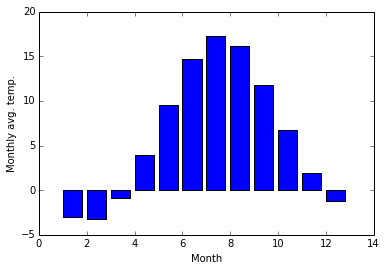

In [90]:
months = arange(1,13)
monthly_mean = [mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Výpočty s vícerozměrnými daty

Pokud je funkce jako `min`, `max` apod. použita na vícerozměrné pole, je někdy účelem ji aplikovat na celé pole, jindy zase po řádcích nebo sloupcích. K tomuto účelu slouží argument `axis`.

In [91]:
m = rand(3,3)
m

array([[ 0.20312099,  0.34910491,  0.73472425],
       [ 0.26928052,  0.02423392,  0.68940864],
       [ 0.52346347,  0.47291159,  0.81890913]])

In [92]:
# globální max
m.max()

0.81890912601599641

In [93]:
# max pro každý sloupec
m.max(axis=0)

array([ 0.52346347,  0.47291159,  0.81890913])

In [94]:
# max pro každý řádek
m.max(axis=1)

array([ 0.73472425,  0.68940864,  0.81890913])

Argument `axis` používá mnoho dalších funkcí z numpy.

## Změny rozměrů a spojování polí

Rozměr Numpy polí může být měněn bez kopírování samotných dat, což výrazně tyto operace zrychluje.

In [95]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [96]:
n, m = A.shape

In [97]:
B = A.reshape((1, n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

Ovšem pozor: jelikož data jsou společná, změna v novém poli se projeví i v původním! Numpy to nazývá *views* - pohledy.

In [98]:
B[0,0:5] = 5 # modify the array
B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [99]:
A

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Funkce `flatten` vytvoří jednorozměrné pole (vektor), data jsou v tomto případě kopírována.
We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [100]:
B = A.flatten()
B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [101]:
B[0:5] = 10
B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [102]:
# A se v tomto případě nezměnilo
A

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

### Přidávání dimenzí: `newaxis`

Pomocí `newaxis` můžeme jednoduše pomocí řezů přidávat dimenze. Např. převod 1d vektoru na sloupcovou nebo řádkovou matici.

In [103]:
v = array([1,2,3])
v.shape

(3,)

In [104]:
# vytvoříme sloupec
vc = v[:, newaxis]
vc

array([[1],
       [2],
       [3]])

In [105]:
vc.shape

(3, 1)

In [106]:
# řádek
v[newaxis,:].shape

(1, 3)

### Spojování a opakování

Na spojování a opakování máme funkce `repeat`, `tile`, `vstack`, `hstack` a `concatenate`.

In [107]:
a = array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [108]:
# opakování po prvcích
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [109]:
# skládání celých polí 
tile(a, (3, 2))

array([[1, 2, 1, 2],
       [3, 4, 3, 4],
       [1, 2, 1, 2],
       [3, 4, 3, 4],
       [1, 2, 1, 2],
       [3, 4, 3, 4]])

`concatenate` spojí dvě pole

In [110]:
b = array([[5, 6]])

In [111]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [112]:
# musíme použít b.T
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

`hstack` a `vstack` skládá pole horizontáleně nebo vertikálně

In [113]:
vstack((a, b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [114]:
hstack((a, b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Kopírování dat

Python obecně přiřazuje proměnné pomocí referencí. Numpy objekty nejsou výjimkou.

In [115]:
A = array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [116]:
# B je teď identický objekt s A
B = A 

In [117]:
# změna v B se projeví v A
B[0,0] = 10
A

array([[10,  2],
       [ 3,  4]])

Pokud chceme data zkopírovat, tj. pokud bychom chtěli aby `A` bylo nezávislé na `B`, můžeme použít metodu nebo funci `copy`.

In [118]:
B = A.copy()
# nebo B = copy(A)

In [119]:
# změny v B už se neprojeví v A
B[0,0] = -5
A

array([[10,  2],
       [ 3,  4]])

## Iterace

Obecně se iteraci vyhýbáme a přednost dáváme vektorovým operacím (viz níže). Někdy je ale iterace nevyhnutelná.

In [120]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


Iteruje se přes první index (po řádcích).

In [121]:
M = array([[1,2], [3,4]])

for row in M:
    print("row: {}".format(row))


row: [1 2]
row: [3 4]


Pokud potřebujeme také indexy, použijeme `enumerate`. (Vzpomínáte?)

In [122]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

('row_idx', 0, 'row', array([1, 2]))
('col_idx', 0, 'element', 1)
('col_idx', 1, 'element', 2)
('row_idx', 1, 'row', array([3, 4]))
('col_idx', 0, 'element', 3)
('col_idx', 1, 'element', 4)


In [123]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vektorové funkce

Jak jsme již říkali, vektorové (vektorizované) funkce jsou obecně daleko rychlejší než iterace. Numpy nám naštěstí cestu od skalární po vektorovou funkci usnadňuje.

In [124]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [125]:
# toto bychom chtěli, ale asi to nebude fungovat
Theta(array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Pro vektorizaci naší funkce nám Numpy nabízí `vectorize`.

In [126]:
Theta_vec = vectorize(Theta)

In [127]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

To bylo celkem snadné ... Můžeme také (a pokud to jde tak bychom měli) přepsat naší funkci tak, aby fungovala jak pro skaláry tak pro pole.

In [128]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [129]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [130]:
# funguje i pro skalár
Theta(-1.2), Theta(2.6)

(0, 1)

## Používání polí v podmínkách
Pokud chceme testovat po prvcí, v podmínkách pak použijeme metody `all` nebo `any`.

In [131]:
M

array([[ 1,  4],
       [ 9, 16]])

In [132]:
# výsledkem M > 5 je pole boolovských hodnot
M > 5

array([[False, False],
       [ True,  True]], dtype=bool)

In [133]:
if (M > 5).any():
    print("M obsahuje alespoň jeden prvek větší než 5")
else:
    print("M neobsahuje žádný prvek větší než 5")

M obsahuje alespoň jeden prvek větší než 5


In [134]:
if (M > 5).all():
    print("všechny prvky v M jsou větší než 5")
else:
    print("M obsahuje alespoň jeden prvek menší rovno 5")

M obsahuje alespoň jeden prvek menší rovno 5


## Změna typů
Numpy pole jsou *staticky typované*. Pro změnu typu můžeme použít metodu `astype` (případně `asarray`).

In [135]:
M.dtype

dtype('int64')

In [136]:
M2 = M.astype(float)
M2

array([[  1.,   4.],
       [  9.,  16.]])

In [137]:
M2.dtype

dtype('float64')

In [138]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## Další čtení

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.
* http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html

## Verze

In [139]:
# použijeme speciální IPython rozšíření
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [140]:
%load_ext version_information

%version_information numpy

Software versions
Python 2.7.7 64bit [GCC 4.1.2 20080704 (Red Hat 4.1.2-54)]
IPython 2.1.0
OS Linux 3.16.6 203.fc20.x86_64 x86_64 with fedora 20 Heisenbug
numpy 1.8.1
Tue Nov 04 14:29:06 2014 CET